In [1]:
import sys
import german
import heart
import wine
from sklearn.cross_validation import KFold
from sklearn.cross_validation import StratifiedKFold
# import random
import classifiers
from itertools import combinations
from matplotlib import pylab as pl
import numpy as np
%matplotlib inline

## Readme

Kernel set is specified in `get_classifier_specs()` procedure. `get_data` returns a dictionary like `{"dataset_name":(X, Y), ...}`. Margins are calculated for each kernel via `SVC.decision.function()` method

__Note__: INK-spline SVM learning process usually takes a lot of time.

In [2]:
def get_classifier_specs():
    """
    Procedure specifies interesting kernels that are observed in the project.
    If you want to change the set of classifiers, you are welcome to edit this function.
    Specs format available in docs and classifiers.py module
    :return: list of kernel specs, that are processed in get_classifiers()
    """
    specs = []
    specs.append(["linear"])
    specs.append(["poly", 2])
    specs.append(["poly", 3])
    specs.append(["poly", 4])
#     specs.append(["ink", 1, -3])
#     specs.append(["ink", 2, -3])
    for i in [0.0001, 0.001, 0.01, 0.1, 1]:
        specs.append((["rbf", i]))
    return specs

def get_data():
    """
    Loads data from processed sources
    :return: list of (X, y) tuples
    """
    data = []
    data.append(german.load())
    data.append(heart.load())
    data.append(wine.load())

    data_dict = {}
    for dataset in data:
        data_dict[dataset[2]] = (dataset[0], dataset[1])
    return data_dict

def train_clfs(clfs, X_train, Y_train):
    for clf in clfs:
        clf.fit(X_train, Y_train)
    return None

def get_margins(clfs, X_train):
    margins = np.zeros((X_train.shape[0], len(clfs)))
    for idx, clf in enumerate(clfs):
        margins[:, idx] = clf.decision_function(X_train)
    return margins

## SVM Distance

In [3]:
def clf_symdiff(clf1, clf2):
    sv_set1 = set(clf1.support_)
    sv_set2 = set(clf2.support_)
    return len(sv_set1 ^ sv_set2)

def clf_symdiff_normalized(clf1, clf2):
    sv_set1 = set(clf1.support_)
    sv_set2 = set(clf2.support_)
    return len(sv_set1 ^ sv_set2) / (len(sv_set1) + len(sv_set2))

## Calculating and drawing here

In [4]:
def margin_cov_pic(margins, clfs):
    clfs_num = len(clfs)
    covs_num = round(clfs_num * (clfs_num - 1) / 2)
    covs = np.zeros(covs_num)
    difs = np.zeros(covs_num)
    idx = 0
    for i in range(clfs_num):
        for j in range(i + 1, clfs_num):
            covs[idx] = np.corrcoef(margins[:, i], margins[:, j])[0, 1]
            difs[idx] = clf_symdiff(clfs[i], clfs[j])
            idx += 1
    pl.scatter(difs, 1 - covs, marker='o')
    pl.show()
            
# def do_things(dataset, key):
#     folds = StratifiedKFold(dataset[1], shuffle=True, random_state=None, n_folds=5)
#     specs = get_classifier_specs()
#     clfs = classifiers.get(specs, C=100)
#     for train, test in folds:
#         X_train, X_test = dataset[0][train], dataset[0][test]
#         Y_train, Y_test = dataset[1][train], dataset[1][test]
#         train_clfs(clfs, X_train, Y_train)
#         margins = get_margins(clfs, X_train)
#         margin_cov_pic(margins, clfs)

## Wine dataset

In [5]:
data = get_data()
dataset = data["wine"]
specs = get_classifier_specs()
clfs = classifiers.get(specs)
train_clfs(clfs, dataset[0], dataset[1])
        

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


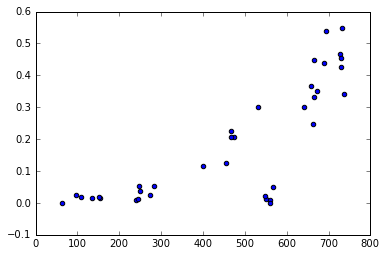

In [6]:
margins = get_margins(clfs, dataset[0])
margin_cov_pic(margins, clfs)

## German credits

In [7]:
data = get_data()
dataset = data["german"]
specs = get_classifier_specs()
clfs = classifiers.get(specs)
train_clfs(clfs, dataset[0], dataset[1])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


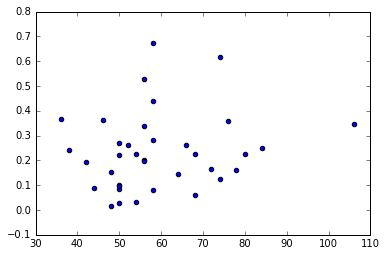

In [8]:
margins = get_margins(clfs, dataset[0])
margin_cov_pic(margins, clfs)

## Heart dataset

In [9]:
data = get_data()
dataset = data["heart"]
specs = get_classifier_specs()
clfs = classifiers.get(specs)
train_clfs(clfs, dataset[0], dataset[1])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


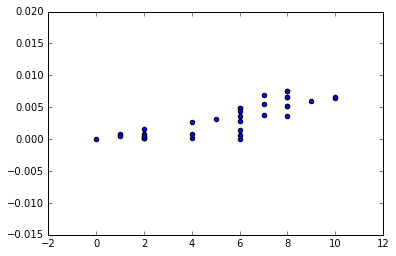

In [10]:
margins = get_margins(clfs, dataset[0])
margin_cov_pic(margins, clfs)